# Bike Sharing Assignment
### Submitted by `Ayush Mandowara`

# Imports

In [1]:
# Standard EDA imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression imports
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Additional imports
import calendar

# Data Understanding and Preparation

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
sum(df.isna().sum())

0

##### Observation: There are no null values in the dataset

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Since instant is an index variable, we can drop it

In [8]:
df = df.drop('instant', axis=1)

In [9]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# sns.pairplot(df)

#### Information such as year, month, holiday, weekday and season is already present in the dataset, we can drop dteday from which we would have otherwise derived these columns

In [11]:
df = df.drop('dteday', axis=1)

In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Since seasons have no inherent order, we can just map them to the actual season names

In [13]:
season_map = {
    1: "spring",
    2: "summer",
    3: "fall",
    4: "winter"
}

In [14]:
df['season'] = df['season'].map(season_map)

In [15]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


#### Changingvalue_countscolumn name from `yr` to `is_year_2019`

In [17]:
df.rename(columns={'yr':'is_year_2019'}, inplace=True)

In [18]:
df.head()

,season,is_year_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Mapping Month to Month Names

In [19]:
mnth_map = {index: month for index, month in enumerate(calendar.month_abbr) if month}

In [20]:
print(mnth_map)

{1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


In [21]:
df['mnth'] = df['mnth'].map(mnth_map)

In [22]:
df.head()

,season,is_year_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### mapping weathersit to actual weather conditions
- Here, I am assuming that the order doesn't matter, however, this can be discussed with the organisation whether they would want the weather to be ranked instead. This is because indeed for the cycling business, it could be that Sunny is better than Rainy.

In [23]:
weather_map = {
    1: "sunny", 
    2: "misty",
    3: "rainy",
    4: "extreme"
}

In [24]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

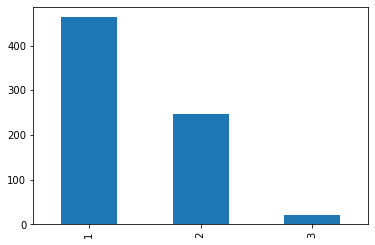

In [25]:
df['weathersit'].value_counts().plot(kind='bar')
plt.show()

#### Observation: Weather type 4 (i.e. extreme weather) is not present in the dataset and very less data is collected for rainy days. It means that on rainy and extreme days, almost no bikes are being rented

In [26]:
df['weathersit'] = df['weathersit'].map(weather_map)

In [27]:
df.head()

,season,is_year_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,1,1,sunny,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,2,1,sunny,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,3,1,sunny,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Since `cnt` is our target variable and it includes both casual and registered users, dropping both casual and registered users

In [28]:
df = df.drop(['casual', 'registered'], axis=1)

In [29]:
df.head()

,season,is_year_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,sunny,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,sunny,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,sunny,9.305237,11.46350,43.6957,12.522300,1600


#### mapping weekday to weekday name

In [30]:
weekday_map = {index: weekday for index, weekday in enumerate(calendar.day_abbr) if weekday}

In [31]:
print(weekday_map)

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}


In [32]:
df['weekday'].map(weekday_map).head()

0    Sun
1    Mon
2    Tue
3    Wed
4    Thu
Name: weekday, dtype: object

##### Observation: It looks the data isn't aligned properly. Because it is showing Sunday and Monday as off when we look at the head. We will ignore this discrepancy for now and assume that indeed sunday and monday are off, while rest of the days are workingday

In [33]:
df['weekday'] = df['weekday'].map(weekday_map)

In [34]:
df.head()

,season,is_year_2019,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,sunny,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,sunny,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thu,1,sunny,9.305237,11.46350,43.6957,12.522300,1600


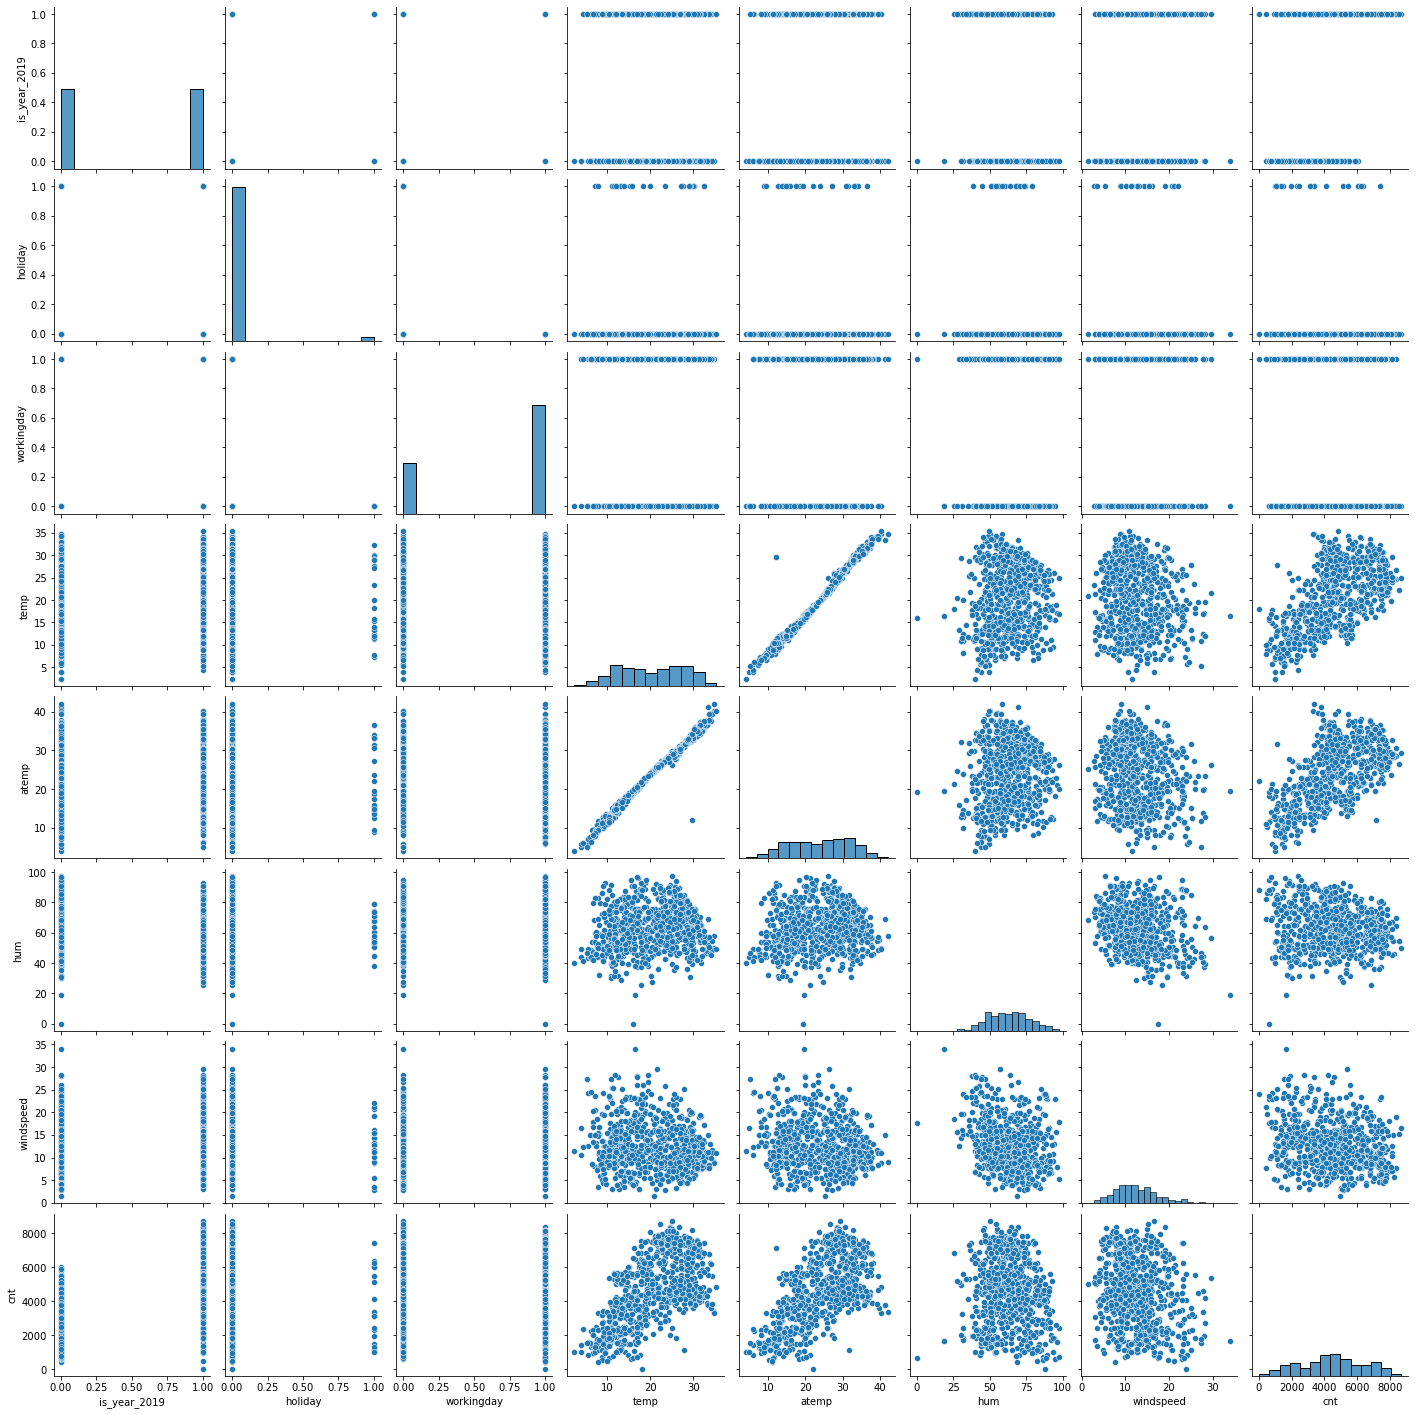

In [35]:
sns.pairplot(df)
plt.savefig('pair_plot.png')
plt.show()

#### It looks like temp and atemp are highly correlated
- Let's look at the heatmap to know the correlation factor

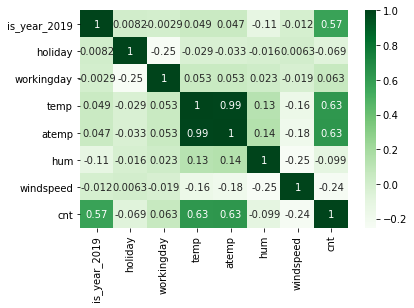

In [36]:
sns.heatmap(df.corr(), annot=True, cmap="Greens")
plt.savefig('correlation_matrix.png')
plt.show()

Since the correlation is 0.99 we can drop one of the variables, as otherwise it will break the homoscedascity rule
- dropping atemp

In [37]:
df = df.drop('atemp', axis=1)

In [38]:
df.head()

,season,is_year_2019,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,sunny,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,sunny,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Thu,1,sunny,9.305237,43.6957,12.522300,1600


#### As per the pairplot 
- workingday doesn't seem to be making an impact on the number of remntals
- people generally prefer renting a bike when it is not a holiday (or number of holidays is quite less, due to which the scatter plot has less number of bike rentantals)
- number of rentals is higher in 2019
- Higher the temperature, higher the number of rentals

In [39]:
df.select_dtypes('object').head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sun,misty
1,spring,Jan,Mon,misty
2,spring,Jan,Tue,sunny
3,spring,Jan,Wed,sunny
4,spring,Jan,Thu,sunny


In [40]:
df.head(1)

,season,is_year_2019,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,misty,14.110847,80.5833,10.749882,985


In [41]:
categorical = df.select_dtypes('object').columns.to_list() + ['is_year_2019', 'holiday', 'workingday']

In [42]:
print(categorical)

['season', 'mnth', 'weekday', 'weathersit', 'is_year_2019', 'holiday', 'workingday']


In [43]:
df[df.columns[~df.columns.isin(categorical)]].head(1)

,temp,hum,windspeed,cnt
0,14.110847,80.5833,10.749882,985


In [44]:
df[categorical].head(1)

,season,mnth,weekday,weathersit,is_year_2019,holiday,workingday
0,spring,Jan,Sun,misty,0,0,0


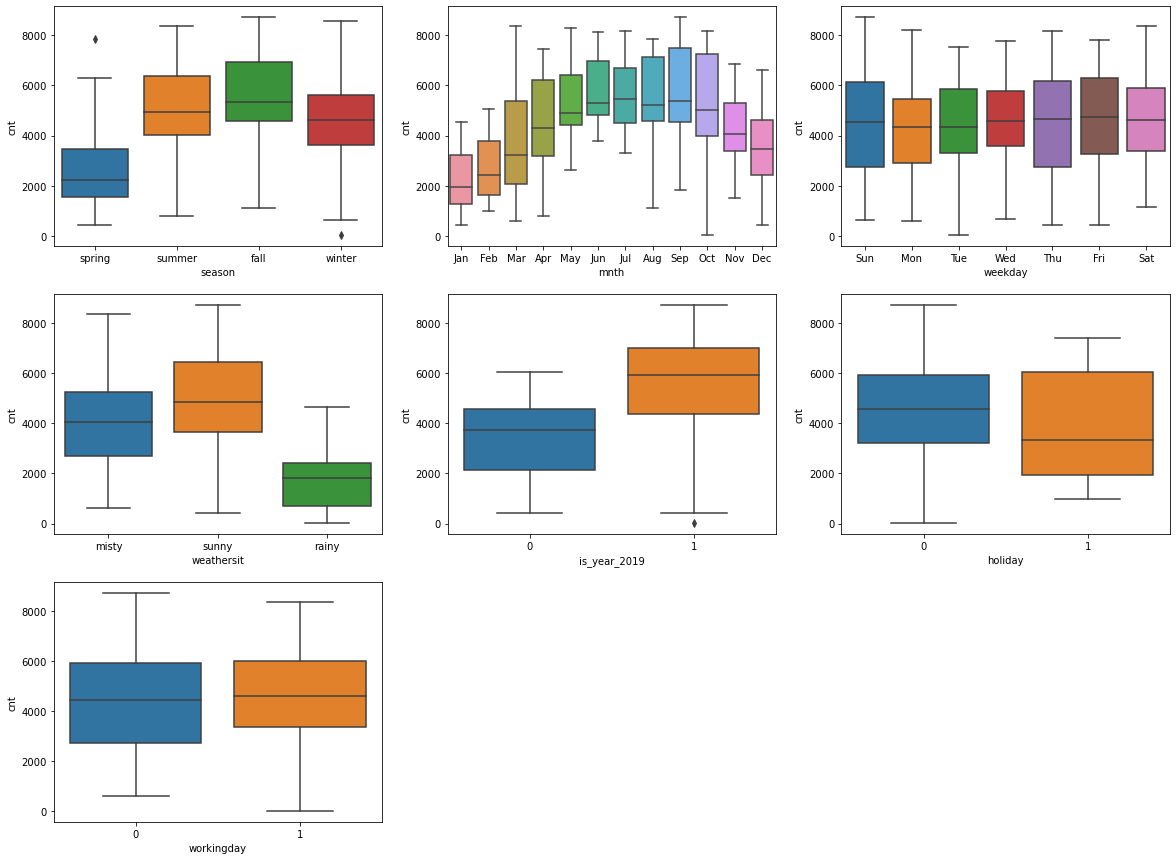

In [45]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))

r = 0
c = 0
for index, cat in enumerate(categorical):
    if index % 3 == 0:
        r += 1
        c = 0
    c += 1
    sns.boxplot(x=cat, y='cnt', data=df, ax=ax[r-1][c-1])
fig.delaxes(ax[2][2])
fig.delaxes(ax[2][1])

plt.savefig('categorical_analysis.png')
plt.show()

#### Observations
- workinday medians are similar for off/working => possibly low impact variable
- weekday on it's own doesn't look like an impactful variable as all boxes look somewhat similar
- holiday, year, month and weather have signicant variations and hence could be good predictors
- Summer and Fall are the best seasons for bike rentals while Spring is the worst
- There aren't any outliers in the dataset, except for spring season as a subset, which we will ignore since it is still in the valid range of bikes (i.e. ~8000)

In [46]:
numeric = [col for col in df.columns.to_list() if col not in categorical]

In [47]:
numeric

['temp', 'hum', 'windspeed', 'cnt']

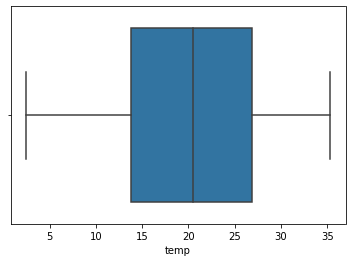

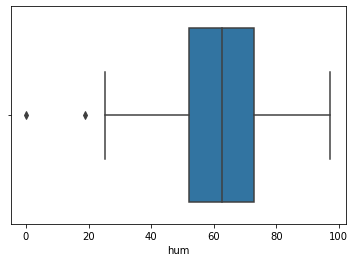

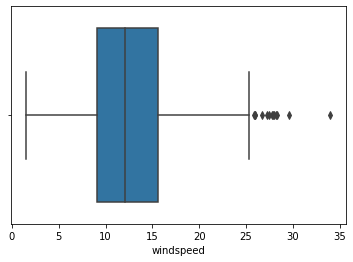

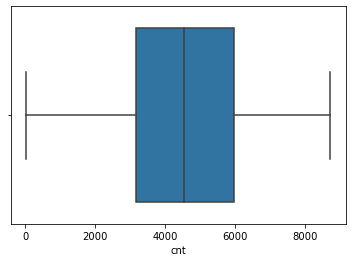

In [48]:
for i in numeric:
    sns.boxplot(x=i, data=df)
    plt.show()

#### Observation:
- doesn't look like there are too many outliers in the dataset for the weather values

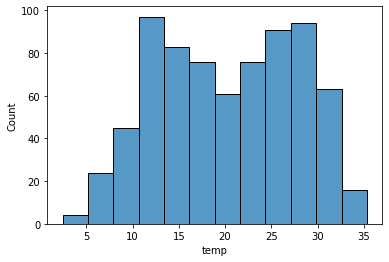

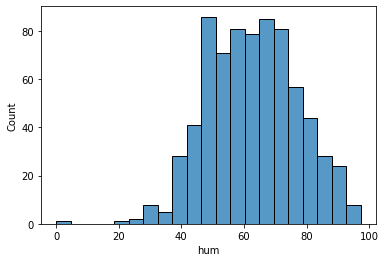

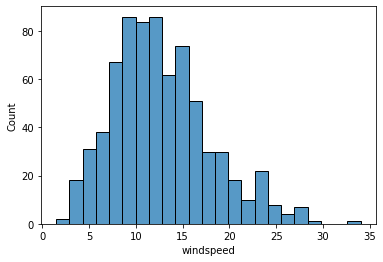

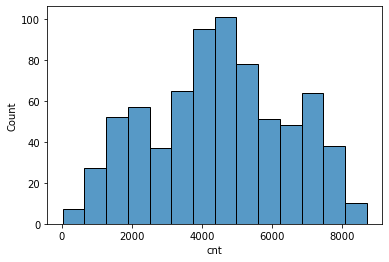

In [49]:
for i in numeric:
    sns.histplot(x=df[i])
    plt.show()

#### Sanity Check to see if months and weather are mapped correclty

In [50]:
mnth_alpha = list(mnth_map.values())

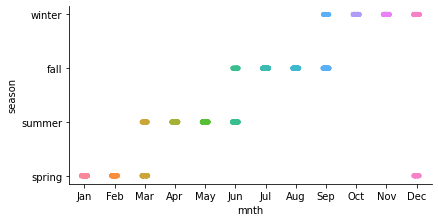

In [51]:
sns.catplot(x='mnth', y='season', data=df, order=mnth_alpha, height=3, aspect=2)
plt.savefig('month_vs_season.png')
plt.show()

In [52]:
df.head()

,season,is_year_2019,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,sunny,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,sunny,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Thu,1,sunny,9.305237,43.6957,12.522300,1600


# Model Building

### We've made some inferences based on the data, let's try to validate these by making a model
- We can prepare two models, one which considers weekday and working day, and the other which does not
- firstly, we will consider weekday and working day as well

### Before building the model
- we will have to convert the categorical data to dummy variables

## Dummy Variables

In [53]:
bike_df = pd.get_dummies(df, drop_first=True)

In [54]:
len(bike_df.columns)

29

In [55]:
len(df.columns)

11

##### Observation: 18 columns have been added due to dummy variable creation. 
- If we get dummies on the whole dataframe and set drop_first = True, our dummies will be created and the original variables will be automatically removed as well

In [56]:
pd.set_option("display.max_columns", 100)

In [57]:
bike_df.head(2)

,is_year_2019,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_rainy,weathersit_sunny
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [58]:
print(bike_df.columns.to_list())

['is_year_2019', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_rainy', 'weathersit_sunny']


In [59]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_year_2019      730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   cnt               730 non-null    int64  
 7   season_spring     730 non-null    uint8  
 8   season_summer     730 non-null    uint8  
 9   season_winter     730 non-null    uint8  
 10  mnth_Aug          730 non-null    uint8  
 11  mnth_Dec          730 non-null    uint8  
 12  mnth_Feb          730 non-null    uint8  
 13  mnth_Jan          730 non-null    uint8  
 14  mnth_Jul          730 non-null    uint8  
 15  mnth_Jun          730 non-null    uint8  
 16  mnth_Mar          730 non-null    uint8  
 1

###### All columns are numeric, as per the expectation of linear regression

## Train Test Split

In [60]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [61]:
df_train.shape

(510, 29)

In [62]:
df_test.shape

(219, 29)

## Scaling

In [63]:
bike_df.head(1)

,is_year_2019,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_rainy,weathersit_sunny
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [64]:
bike_df[numeric].describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


##### As the max, min values are in various different ranges for all the numeric variables, we should scale them so that the coefficients can be interpreted properly

#### We will use MinMaxScaling
- This way, we can pass in the whole dataframe for scaling, without worrying about it changing the dummy categorical data

In [65]:
scaler = MinMaxScaler()

In [66]:
df_train.head()

,is_year_2019,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_rainy,weathersit_sunny
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [67]:
df_train = pd.DataFrame(scaler.fit_transform(df_train.values), columns=df_train.columns, index=df_train.index)

In [68]:
df_train.head()

,is_year_2019,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_rainy,weathersit_sunny
653,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.864243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.827658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,0.465255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
728,1.0,0.0,0.0,0.245101,0.498067,0.663106,0.204096,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.482973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


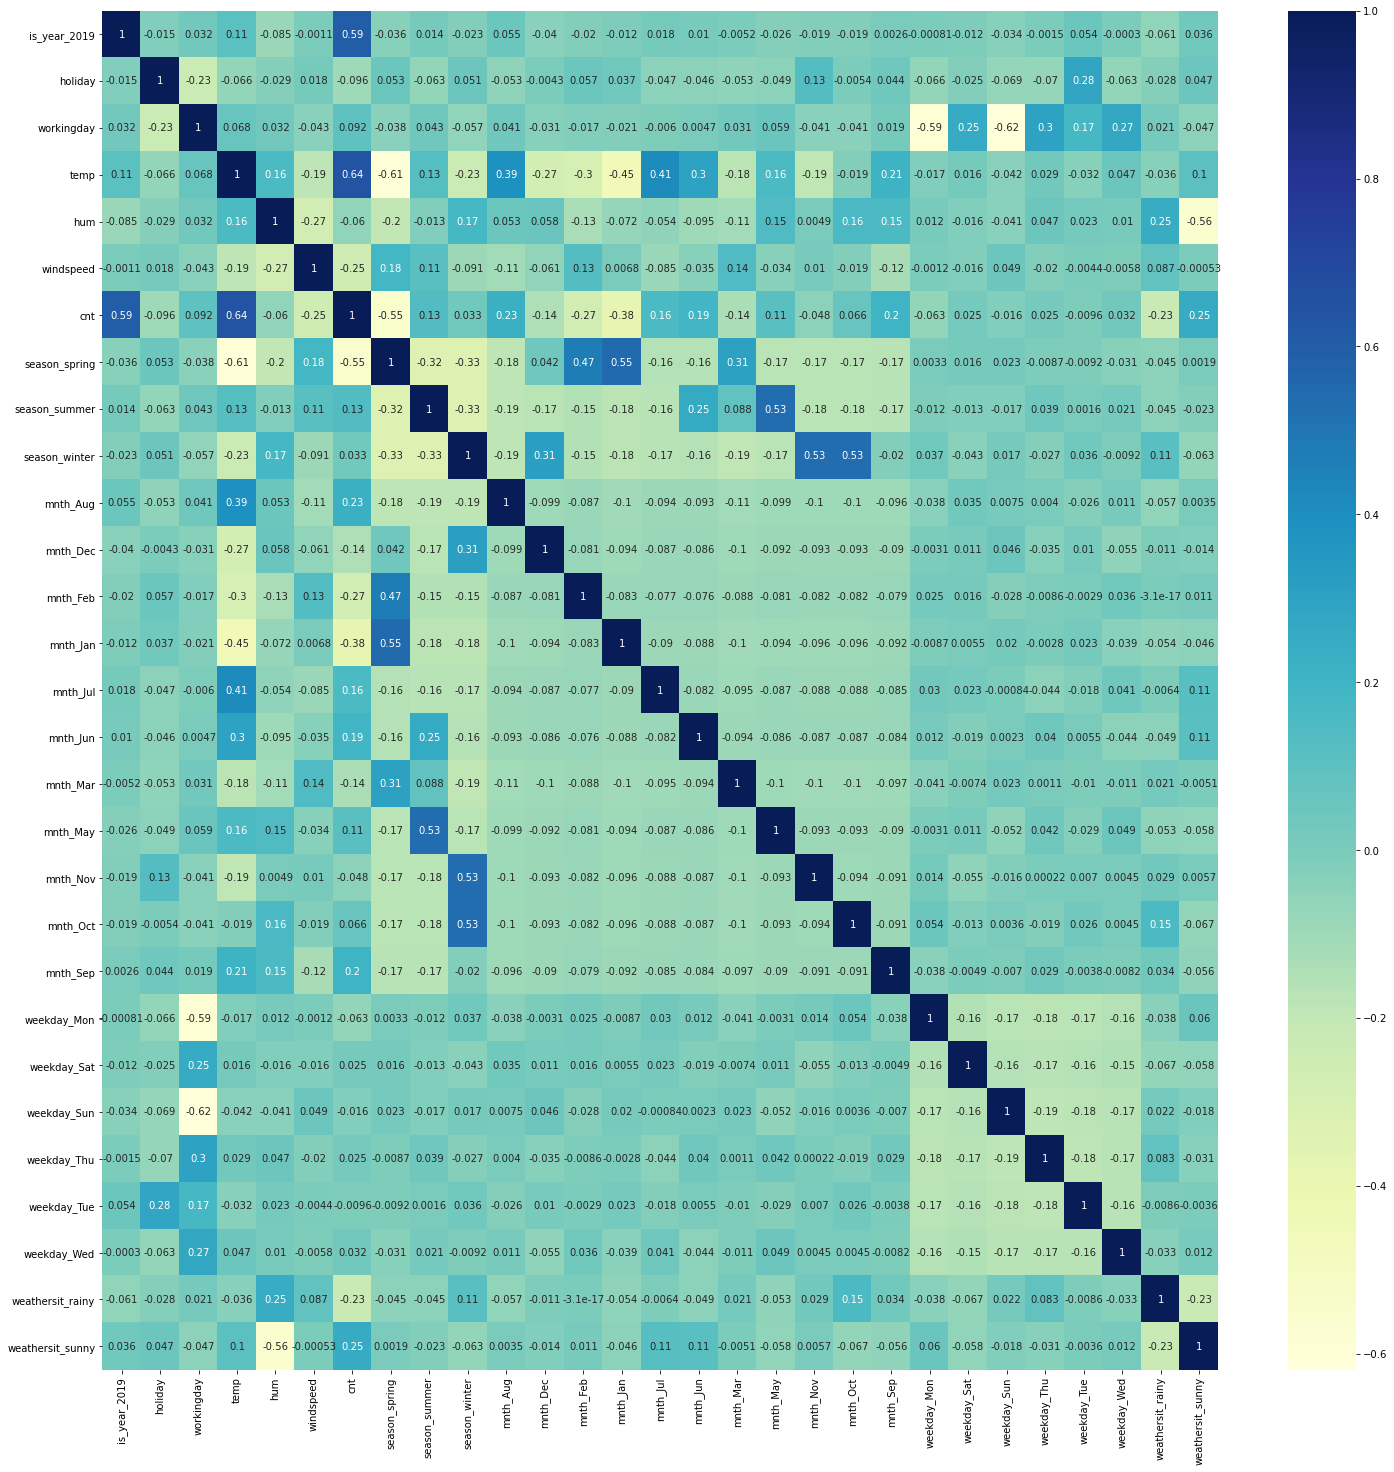

In [69]:
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

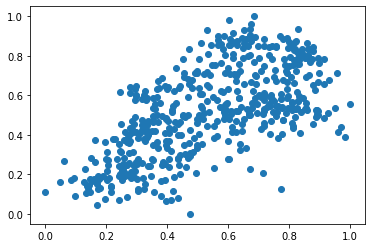

In [70]:
plt.scatter(df_train.temp, df_train.cnt)

### Dividing into X and Y sets for the model building

In [71]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Looking at the most highly correlated param

In [72]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [73]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

In [74]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           5.80e-61
Time:                        23:12:09   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

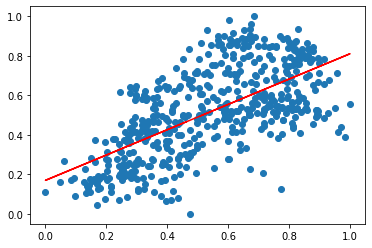

In [75]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.1698 + 0.6400*X_train_lm.iloc[:, 1], 'r')
plt.show()

#### Looking at all the available parameters

In [76]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const               0.192537
is_year_2019        0.232116
holiday            -0.007796
workingday          0.079129
temp                0.450562
hum                -0.151340
windspeed          -0.186453
season_spring      -0.048159
season_summer       0.038725
season_winter       0.105847
mnth_Aug            0.014404
mnth_Dec           -0.045586
mnth_Feb           -0.032282
mnth_Jan           -0.062777
mnth_Jul           -0.040350
mnth_Jun           -0.002972
mnth_Mar            0.001045
mnth_May            0.023940
mnth_Nov           -0.041851
mnth_Oct            0.007534
mnth_Sep            0.081060
weekday_Mon         0.033334
weekday_Sat         0.009237
weekday_Sun         0.087870
weekday_Thu         0.003849
weekday_Tue        -0.011670
weekday_Wed        -0.009653
weathersit_rainy   -0.196376
weathersit_sunny    0.061066
dtype: float64

In [77]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.74e-182
Time:                        23:12:10   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1925      0.038      5.132      0.000       0.119       0.266
is_year_2019         0.2321      0.008     28.820      0.000       0.216       0.248
holiday             -0.0078      0.024     -0.322      0.747      -0.055       0.040
workingday           0.0791      0.013      6.226      0.000       0.054       0.104
temp                 0.4506      0.046      9.734      0.000       0.360       0.542
hum                 -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed           -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring       -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer        0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter        0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug             0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec            -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb            -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan            -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul            -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun            -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar             0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May             0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov            -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct             0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep             0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon          0.0333      0.014      2.344      0.020       0.005       0.061
weekday_Sat          0.0092      0.016      0.595      0.552      -0.021       0.040
weekday_Sun          0.0879      0.014      6.350      0.000       0.061       0.115
weekday_Thu          0.0038      0.015      0.263      0.793      -0.025       0.033
weekday_Tue         -0.0117      0.015     -0.773      0.440      -0.041       0.018
weekday_Wed         -0.0097      0.015     -0.627      0.531      -0.040       0.021
weathersit_rainy    -0.1964      0.025     -7.869      0.000      -0.245      -0.147
weathersit_sunny     0.0611      0.010      5.854      0.000       0.041       0.082
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. N

#### The Ajusted R-squared of the model is decent (0.845) but there are many variables which have high p-value

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,97.20
22,weekday_Sun,22.08
20,weekday_Mon,20.76
6,season_spring,10.79
8,season_winter,9.50
7,season_summer,8.29
3,temp,7.12
17,mnth_Nov,6.80
18,mnth_Oct,6.59
9,mnth_Aug,6.43


### Identifying Most Impactful Variables

##### Since we need to identify which of the variables have the most impact on the target, we will perform feature elimination.

In [79]:
len(df_train.columns)

28

##### Since there are 28 features, we will use a combination of automated and manual selection
- Let's drop half of the variables with the help of Recursive Feature Elimination

In [80]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=14)
rfe = rfe.fit(X_train, y_train)

In [81]:
rfe_df = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['Name', 'Support', 'Ranking'])
rfe_df.sort_values(by='Ranking').reset_index().drop('index', axis=1)

,Name,Support,Ranking
0,is_year_2019,True,1
1,weekday_Sun,True,1
2,mnth_Sep,True,1
3,weathersit_rainy,True,1
4,season_winter,True,1
5,season_summer,True,1
6,mnth_Jul,True,1
7,windspeed,True,1
8,holiday,True,1
9,workingday,True,1


In [82]:
print(list(X_train.columns[~rfe.support_]))

['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed']


In [83]:
print(list(X_train.columns[rfe.support_]))

['is_year_2019', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sun', 'weathersit_rainy', 'weathersit_sunny']


#### Observation: RFE has removed All Weekdays except Sunday
- Medians of all are pretty similar, and sunday has the highest count, so this seems right

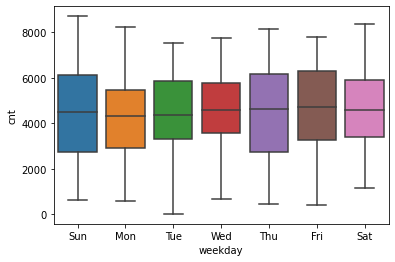

In [84]:
sns.boxplot(x='weekday', y='cnt', data=df)
plt.show()

#### Observation: RFE has removed All Months except April and July
- One possible reason could be that seasons contain month information as well

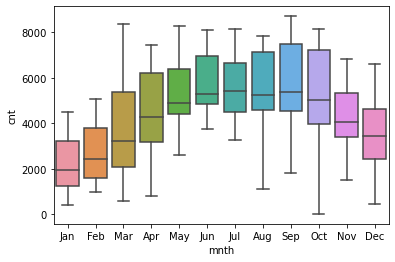

In [85]:
sns.boxplot(x='mnth', y='cnt', data=df)
plt.show()

### Statistical analysis on columns selected by RFE

##### Selecting RFE columns from training dataset

In [86]:
X_train.head(1)

,is_year_2019,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_rainy,weathersit_sunny
653,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [87]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [88]:
print(list(col))

['is_year_2019', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sun', 'weathersit_rainy', 'weathersit_sunny']


In [89]:
X_train_rfe.head(1)

,is_year_2019,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,weekday_Sun,weathersit_rainy,weathersit_sunny
653,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


##### Adding constant required by statsmodel

In [90]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [91]:
X_train_rfe.head(1)

,const,is_year_2019,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,weekday_Sun,weathersit_rainy,weathersit_sunny
653,1.0,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


##### Building Linear Regression model 

In [92]:
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.13e-191
Time:                        23:12:11   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1815      0.039      4.617      0.000       0.104       0.259
is_year_2019         0.2297      0.008     28.660      0.000       0.214       0.245
holiday             -0.0594      0.027     -2.206      0.028      -0.112      -0.006
workingday           0.0432      0.012      3.744      0.000       0.021       0.066
temp                 0.5278      0.033     15.897      0.000       0.463       0.593
hum                 -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed           -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring       -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer        0.0526      0.015      3.553      0.000       0.024       0.082
season_winter        0.1003      0.017      5.890      0.000       0.067       0.134
mnth_Jul            -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_Sep             0.0818      0.016      4.956      0.000       0.049       0.114
weekday_Sun          0.0532      0.015      3.661      0.000       0.025       0.082
weathersit_rainy    -0.1885      0.025     -7.638      0.000      -0.237      -0.140
weathersit_sunny     0.0578      0.010      5.559      0.000       0.037       0.078
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,99.59
7,season_spring,5.02
4,temp,3.62
9,season_winter,3.49
8,season_summer,2.61
5,hum,1.91
3,workingday,1.88
12,weekday_Sun,1.78
14,weathersit_sunny,1.63
10,mnth_Jul,1.49


In [94]:
X_train_rfe_no_const = X_train_rfe.drop('const', axis=1)
lm_without_const = sm.OLS(y_train, X_train_rfe_no_const).fit()
lm_without_const.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1353.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        23:12:11   Log-Likelihood:                          507.11
No. Observations:                 510   AIC:                                     -986.2
Df Residuals:                     496   BIC:                                     -926.9
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_year_2019         0.2337      0.008     28.751      0.000       0.218       0.250
holiday             -0.0461      0.027     -1.687      0.092      -0.100       0.008
workingday           0.0589      0.011      5.235      0.000       0.037       0.081
temp                 0.5954      0.030     19.585      0.000       0.536       0.655
hum                 -0.0491      0.029     -1.676      0.094      -0.107       0.008
windspeed           -0.1365      0.024     -5.685      0.000      -0.184      -0.089
season_spring       -0.0057      0.018     -0.319      0.750      -0.041       0.029
season_summer        0.0784      0.014      5.598      0.000       0.051       0.106
season_winter        0.1343      0.016      8.575      0.000       0.104       0.165
mnth_Jul            -0.0454      0.018     -2.479      0.014      -0.081      -0.009
mnth_Sep             0.0900      0.017      5.377      0.000       0.057       0.123
weekday_Sun          0.0703      0.014      4.901      0.000       0.042       0.098
weathersit_rainy    -0.1986      0.025     -7.920      0.000      -0.248      -0.149
weathersit_sunny     0.0799      0.009      8.476      0.000       0.061       0.098
==============================================================================
Omnibus:                       67.206   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.854
Skew:                          -0.696   Prob(JB):                     5.28e-35
Kurtosis:                       5.343   Cond. No.                         16.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_no_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_no_const.values, i) for i in range(X_train_rfe_no_const.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,23.59
3,temp,19.43
2,workingday,5.30
6,season_spring,4.81
5,windspeed,4.70
8,season_winter,3.78
13,weathersit_sunny,3.45
7,season_summer,2.97
0,is_year_2019,2.08
11,weekday_Sun,1.97


In [96]:
X_train_rfe_no_const.head()

,is_year_2019,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,weekday_Sun,weathersit_rainy,weathersit_sunny
653,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
728,1.0,0.0,0.0,0.245101,0.498067,0.663106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
X_train_rfe_no_const_no_hum = X_train_rfe_no_const.drop('hum', axis=1)
lm_without_const_no_const_no_hum = sm.OLS(y_train, X_train_rfe_no_const_no_hum).fit()
lm_without_const_no_const_no_hum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1452.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        23:12:11   Log-Likelihood:                          505.67
No. Observations:                 510   AIC:                                     -985.3
Df Residuals:                     497   BIC:                                     -930.3
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_year_2019         0.2345      0.008     28.844      0.000       0.219       0.251
holiday             -0.0490      0.027     -1.794      0.073      -0.103       0.005
workingday           0.0557      0.011      5.012      0.000       0.034       0.077
temp                 0.5559      0.019     28.912      0.000       0.518       0.594
windspeed           -0.1337      0.024     -5.571      0.000      -0.181      -0.087
season_spring       -0.0262      0.013     -2.000      0.046      -0.052      -0.000
season_summer        0.0672      0.012      5.446      0.000       0.043       0.091
season_winter        0.1163      0.011     10.188      0.000       0.094       0.139
mnth_Jul            -0.0458      0.018     -2.494      0.013      -0.082      -0.010
mnth_Sep             0.0843      0.016      5.136      0.000       0.052       0.117
weekday_Sun          0.0675      0.014      4.731      0.000       0.039       0.096
weathersit_rainy    -0.2051      0.025     -8.263      0.000      -0.254      -0.156
weathersit_sunny     0.0865      0.009     10.069      0.000       0.070       0.103
==============================================================================
Omnibus:                       67.283   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.532
Skew:                          -0.694   Prob(JB):                     2.28e-35
Kurtosis:                       5.362   Cond. No.                         9.97
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_no_const_no_hum.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_no_const_no_hum.values, i) for i in range(X_train_rfe_no_const_no_hum.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.74
2,workingday,5.15
4,windspeed,4.68
12,weathersit_sunny,2.86
5,season_spring,2.57
6,season_summer,2.30
0,is_year_2019,2.07
7,season_winter,2.00
10,weekday_Sun,1.95
8,mnth_Jul,1.59


#### Even though dropping const is giving better Ajusted $R^2$, it is forcing us to drop variables like humidity and temperature due to high vif/p-values, which are important indicators for the Bike Sharing business as it as an outdoor activity.
- To add to that, according to research online, and discussion with mentors on forum, it is best to keep const and not look at it's high VIF value. Hence, we will not be using this approach

In [99]:
X_train_rfe.head(1)

,const,is_year_2019,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,weekday_Sun,weathersit_rainy,weathersit_sunny
653,1.0,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [100]:
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.13e-191
Time:                        23:12:11   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1815      0.039      4.617      0.000       0.104       0.259
is_year_2019         0.2297      0.008     28.660      0.000       0.214       0.245
holiday             -0.0594      0.027     -2.206      0.028      -0.112      -0.006
workingday           0.0432      0.012      3.744      0.000       0.021       0.066
temp                 0.5278      0.033     15.897      0.000       0.463       0.593
hum                 -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed           -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring       -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer        0.0526      0.015      3.553      0.000       0.024       0.082
season_winter        0.1003      0.017      5.890      0.000       0.067       0.134
mnth_Jul            -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_Sep             0.0818      0.016      4.956      0.000       0.049       0.114
weekday_Sun          0.0532      0.015      3.661      0.000       0.025       0.082
weathersit_rainy    -0.1885      0.025     -7.638      0.000      -0.237      -0.140
weathersit_sunny     0.0578      0.010      5.559      0.000       0.037       0.078
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,99.59
7,season_spring,5.02
4,temp,3.62
9,season_winter,3.49
8,season_summer,2.61
5,hum,1.91
3,workingday,1.88
12,weekday_Sun,1.78
14,weathersit_sunny,1.63
10,mnth_Jul,1.49


##### As season_spring has VIF > 0.5, let's try dropping it

In [102]:
X_train_rfe_drop_spring = X_train_rfe.drop('season_spring', axis=1)
X_train_rfe_drop_spring.head(1)

,const,is_year_2019,holiday,workingday,temp,hum,windspeed,season_summer,season_winter,mnth_Jul,mnth_Sep,weekday_Sun,weathersit_rainy,weathersit_sunny
653,1.0,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [103]:
lm_without_spring = sm.OLS(y_train,X_train_rfe_drop_spring).fit()
lm_without_spring.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.77e-191
Time:                        23:12:11   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1261      0.034      3.740      0.000       0.060       0.192
is_year_2019         0.2284      0.008     28.368      0.000       0.213       0.244
holiday             -0.0611      0.027     -2.256      0.025      -0.114      -0.008
workingday           0.0436      0.012      3.750      0.000       0.021       0.066
temp                 0.5945      0.022     26.713      0.000       0.551       0.638
hum                 -0.1708      0.037     -4.571      0.000      -0.244      -0.097
windspeed           -0.1877      0.025     -7.386      0.000      -0.238      -0.138
season_summer        0.0806      0.011      7.590      0.000       0.060       0.101
season_winter        0.1368      0.010     13.145      0.000       0.116       0.157
mnth_Jul            -0.0456      0.018     -2.552      0.011      -0.081      -0.010
mnth_Sep             0.0945      0.016      5.938      0.000       0.063       0.126
weekday_Sun          0.0535      0.015      3.655      0.000       0.025       0.082
weathersit_rainy    -0.1859      0.025     -7.493      0.000      -0.235      -0.137
weathersit_sunny     0.0554      0.010      5.314      0.000       0.035       0.076
==============================================================================
Omnibus:                       59.216   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.277
Skew:                          -0.645   Prob(JB):                     1.40e-28
Kurtosis:                       5.092   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_drop_spring.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_drop_spring.values, i) for i in range(X_train_rfe_drop_spring.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,72.31
5,hum,1.89
3,workingday,1.88
11,weekday_Sun,1.78
13,weathersit_sunny,1.62
4,temp,1.60
9,mnth_Jul,1.43
7,season_summer,1.33
8,season_winter,1.29
10,mnth_Sep,1.19


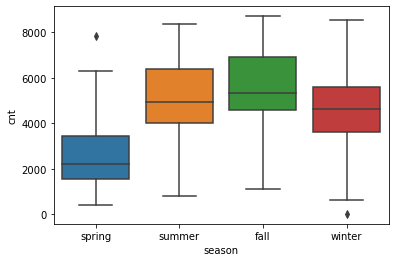

In [105]:
sns.boxplot(x='season', y='cnt', data=df)
plt.show()

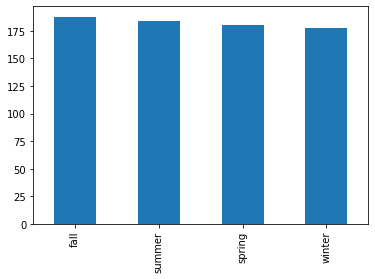

In [106]:
df['season'].value_counts().plot(kind='bar')
plt.show()

### Dropping spring decreases Adjusted $R^2$ a little. Moreover, we can see in the boxplot that the demand in spring is low than other seasons, and the coefficient for spring is negative, hence we will keep it even though it has VIF of 5.02

### Final Model

In [107]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.13e-191
Time:                        23:12:11   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1815      0.039      4.617      0.000       0.104       0.259
is_year_2019         0.2297      0.008     28.660      0.000       0.214       0.245
holiday             -0.0594      0.027     -2.206      0.028      -0.112      -0.006
workingday           0.0432      0.012      3.744      0.000       0.021       0.066
temp                 0.5278      0.033     15.897      0.000       0.463       0.593
hum                 -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed           -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring       -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer        0.0526      0.015      3.553      0.000       0.024       0.082
season_winter        0.1003      0.017      5.890      0.000       0.067       0.134
mnth_Jul            -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_Sep             0.0818      0.016      4.956      0.000       0.049       0.114
weekday_Sun          0.0532      0.015      3.661      0.000       0.025       0.082
weathersit_rainy    -0.1885      0.025     -7.638      0.000      -0.237      -0.140
weathersit_sunny     0.0578      0.010      5.559      0.000       0.037       0.078
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Top Indicators

In [108]:
lm.params.abs().sort_values(ascending=False)

temp                0.527819
is_year_2019        0.229738
weathersit_rainy    0.188485
const               0.181532
windspeed           0.180601
hum                 0.159467
season_winter       0.100294
mnth_Sep            0.081773
holiday             0.059434
weathersit_sunny    0.057847
season_spring       0.055434
mnth_Jul            0.054881
weekday_Sun         0.053203
season_summer       0.052613
workingday          0.043216
dtype: float64

#### An important point to note here that year 2019 has a large constant. Now, even though we will never see 2019 again, the data is in comparision with 2018. Essentially, it indicates that as the years will go by, the demand will increase.

### Let's check whether error terms are following linear regression assumptions or not
- error terms should have constant variance
- error terms should be indpendent of each other (no patterns should be observed)
- error terms should have a normal distribution
- error terms should have mean 0

In [109]:
y_train_pred = lm.predict(X_train_rfe)

In [110]:
y_train_pred.head()

653    0.735682
576    0.724197
426    0.494339
728    0.343870
482    0.611435
dtype: float64

In [111]:
y_train_pred.shape

(510,)

In [112]:
res = y_train - y_train_pred

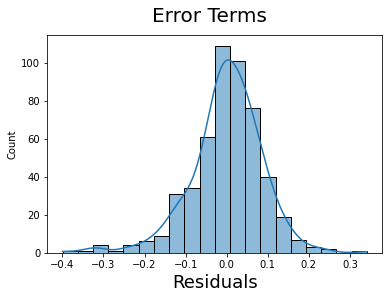

In [113]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((res), bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 18)                         # X-label
plt.savefig('normality_check.png')
plt.show()

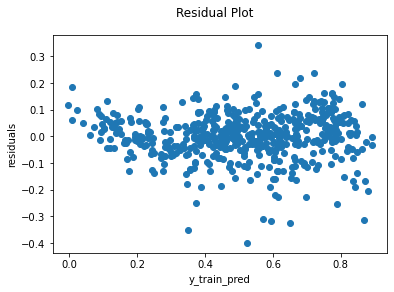

In [114]:
# test for constant variance
plt.scatter(x=y_train_pred, y=res)
plt.xlabel('y_train_pred')
plt.ylabel('residuals')
plt.suptitle('Residual Plot')
plt.savefig('variance_check.png')
plt.show()

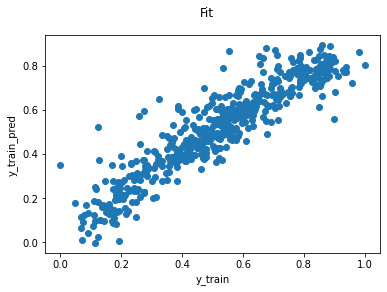

In [115]:
# test for fit
plt.scatter(y_train, y_train_pred)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.suptitle('Fit')
plt.savefig('fit_check.png')
plt.show()

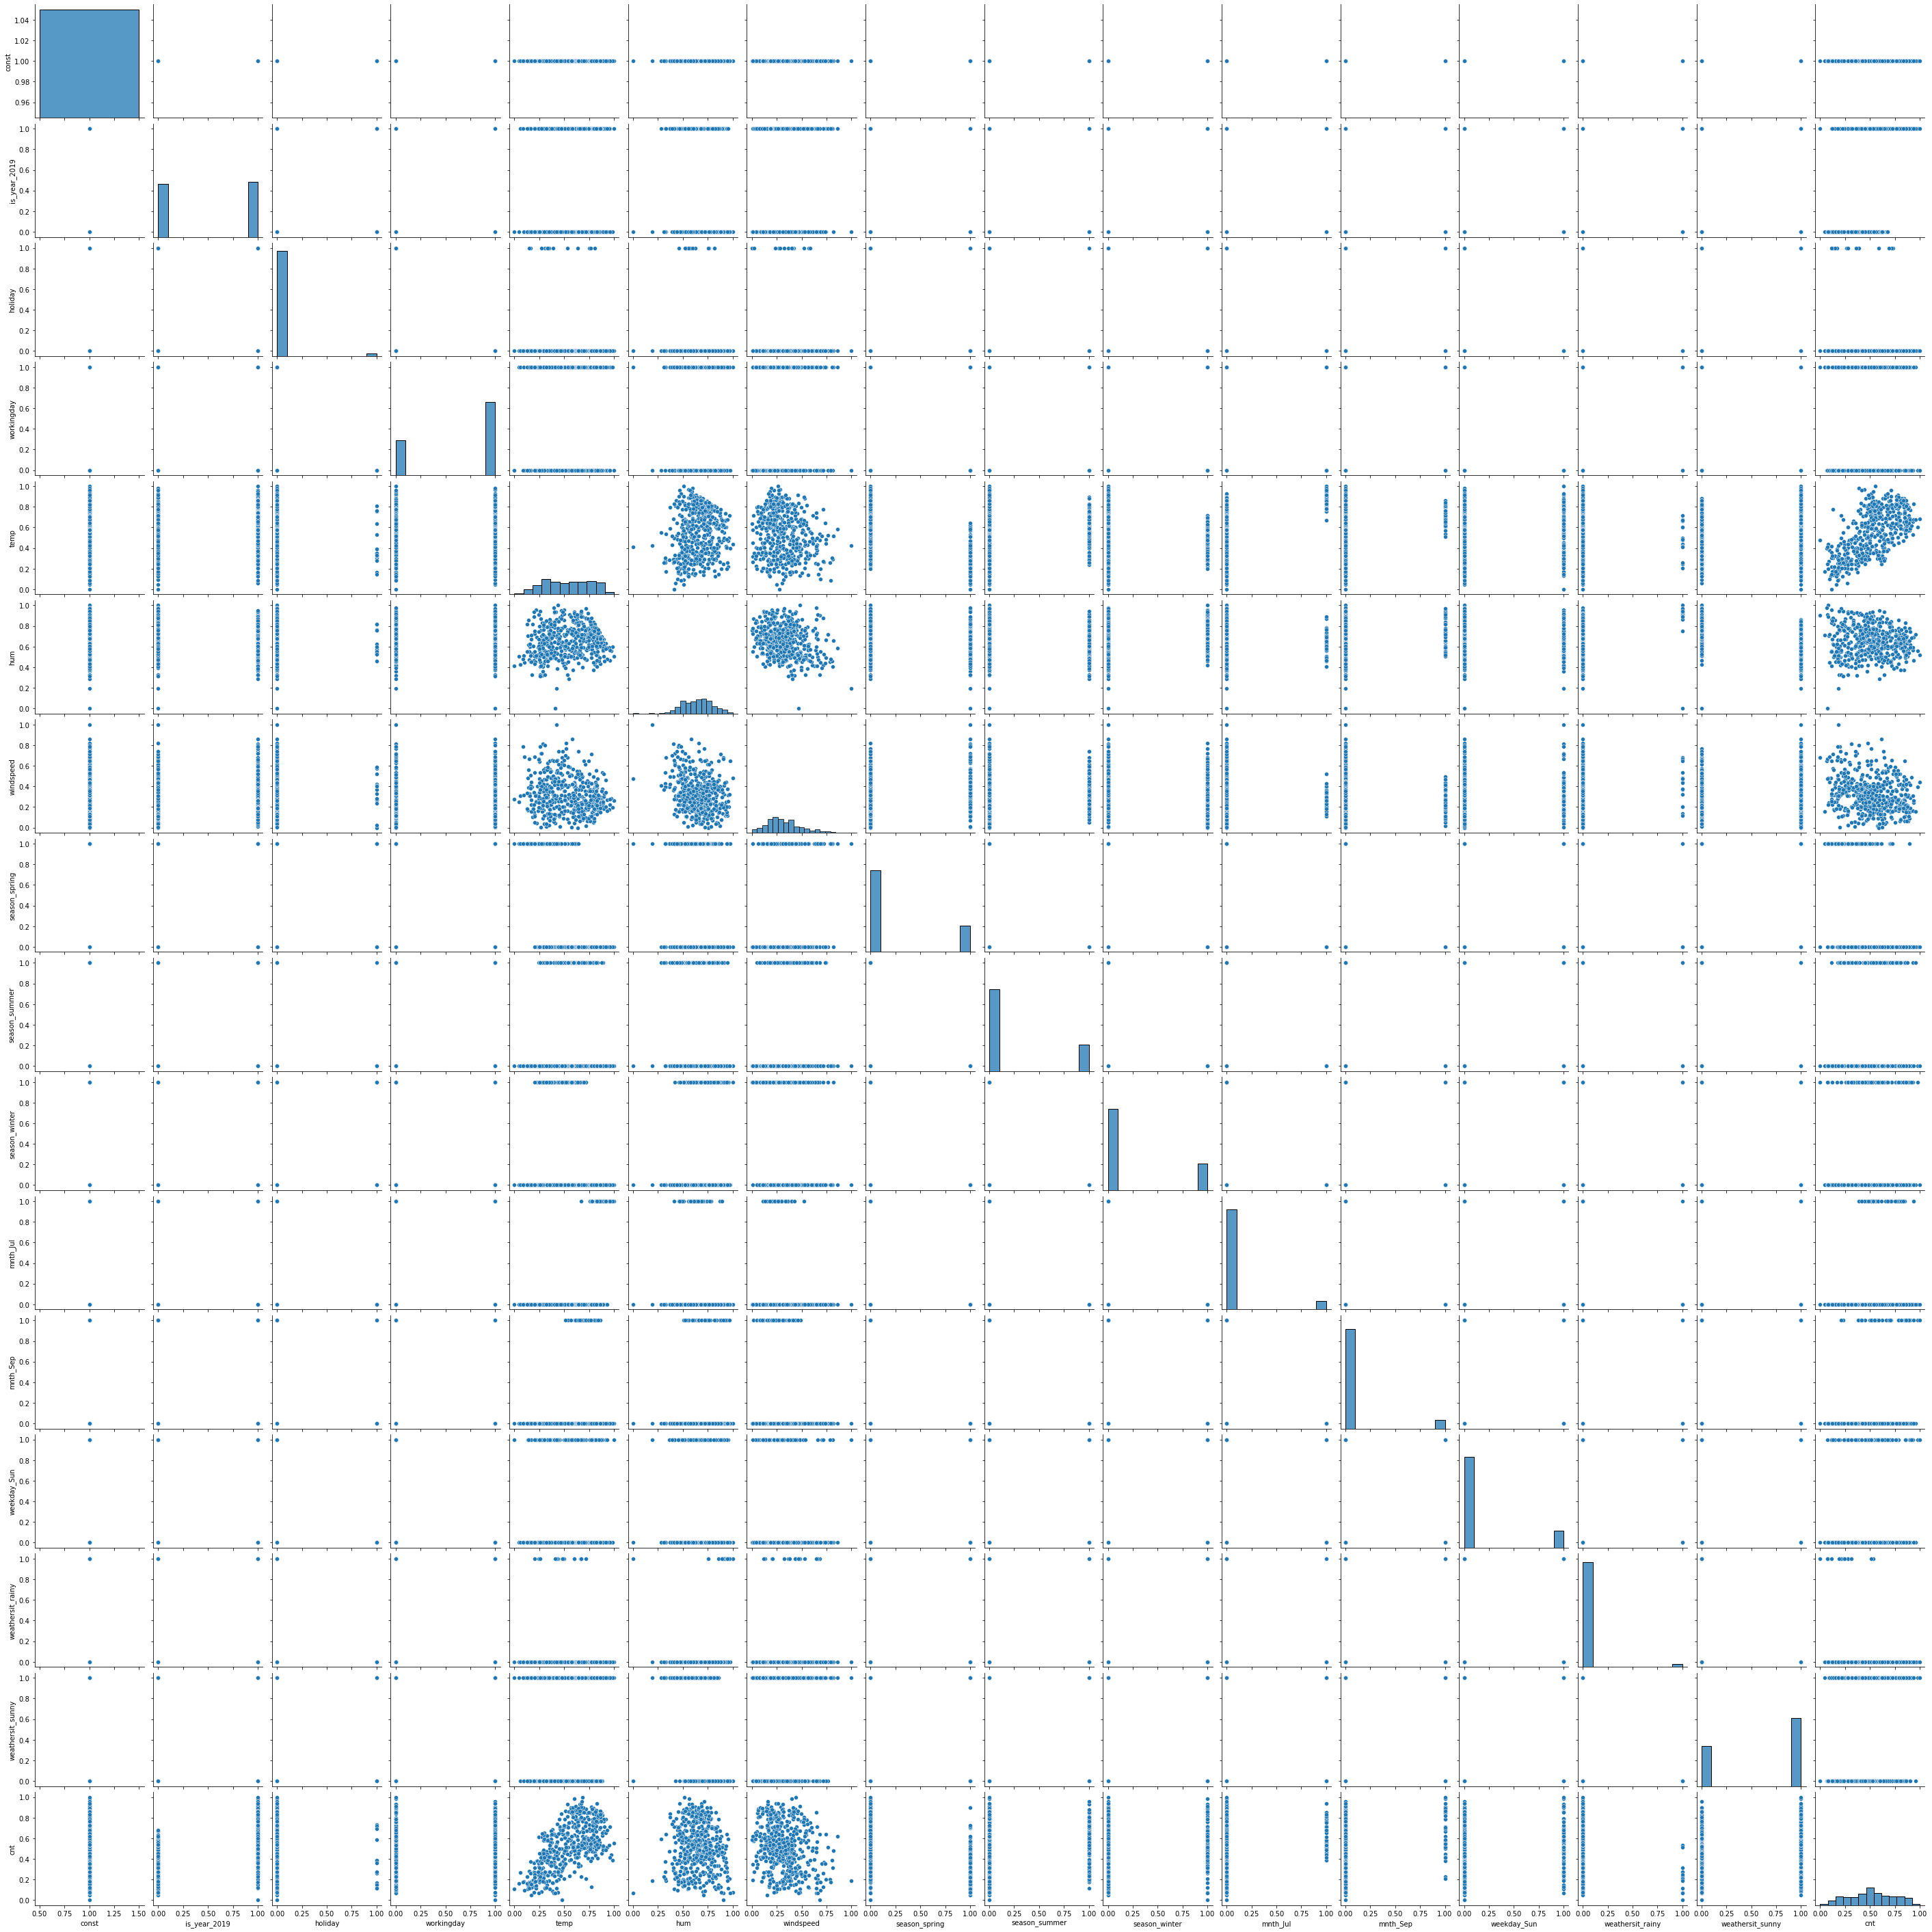

In [116]:
sns.pairplot(pd.concat([X_train_rfe, y_train], axis=1))
plt.savefig('linearity_check.png')
plt.show()

### Observation:
- y_train and y_train_pred are tightly related, which means model fits well on training set
- Residuals are normally distributed, and have a mean value of zero
- Residuals have a constant variance

### Let's analyse on Test Set

In [117]:
df_test = pd.DataFrame(scaler.transform(df_test.values), columns=df_test.columns, index=df_test.index)

In [118]:
y_test = df_test.pop('cnt')
X_test = df_test

In [119]:
col = X_test.columns[rfe.support_]
X_test_rfe = X_test[col]

In [120]:
X_test_rfe = sm.add_constant(X_test_rfe)

In [121]:
y_test_pred = lm.predict(X_test_rfe)

In [122]:
res_test = y_test_pred - y_test

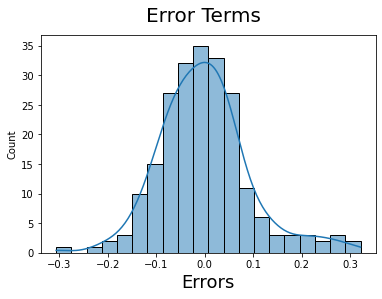

In [123]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot(res_test, bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

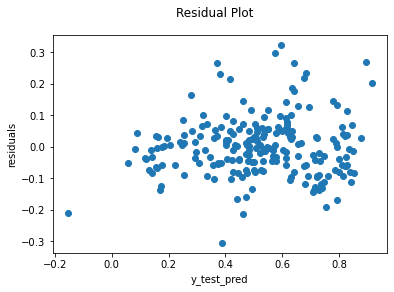

In [124]:
plt.scatter(y_test_pred, res_test)
plt.xlabel('y_test_pred')
plt.ylabel('residuals')
plt.suptitle('Residual Plot')
plt.show()

### Observation on Test Set:
- y_test and y_test_pred are tightly related, which means model fits well on test set
- Residuals are normally distributed, and have a mean value of zero
- Residuals have a constant variance
- No particular pattern for residuals is observed

# R2 Score

In [125]:
round(r2_score(y_true=y_test, y_pred=y_test_pred), 4)*100

81.69

##### R2 Score on Test Set is `81.69%`

In [126]:
round(r2_score(y_true=y_train, y_pred=y_train_pred), 3)*100

84.7

##### R2 Score on Train Set is `84.7%`

#### The R2 score on training set is 84.7%, while it is 81.69% on the test set. 
It implies that the model is 
- fitting well 
- able to generalize it's learnings on unseen data

Moreover, as per the $R^2$ score we can say that the model is able to explain 81.69% variance in Y. 
Given that all linear regression assumptions have been satisfied (proved above), We can say that it is very good for a linear regression model.

In [127]:
X_test_rfe.head(1)

,const,is_year_2019,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,weekday_Sun,weathersit_rainy,weathersit_sunny
184,1.0,0.0,1.0,0.0,0.831783,0.657364,0.084219,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Model Parameters

In [128]:
# sort the parameters from highest to lower (absolute) coefficent
top_params = lm.params.reindex(lm.params.abs().sort_values(ascending=False).index)

In [129]:
top_params.index

Index(['temp', 'is_year_2019', 'weathersit_rainy', 'const', 'windspeed', 'hum',
       'season_winter', 'mnth_Sep', 'holiday', 'weathersit_sunny',
       'season_spring', 'mnth_Jul', 'weekday_Sun', 'season_summer',
       'workingday'],
      dtype='object')

In [130]:
eq = []
for i, j in zip(list(top_params.index), list(top_params)):
    if i == 'const':
        pass
    else:
        eq.extend(['(', round(j,3), '*', i, ')', ' + '])

eq.append(top_params['const'])

In [131]:
model_equation = "".join(map(str,eq))

## Model Equation

In [132]:
print(model_equation)

(0.528*temp) + (0.23*is_year_2019) + (-0.188*weathersit_rainy) + (-0.181*windspeed) + (-0.159*hum) + (0.1*season_winter) + (0.082*mnth_Sep) + (-0.059*holiday) + (0.058*weathersit_sunny) + (-0.055*season_spring) + (-0.055*mnth_Jul) + (0.053*weekday_Sun) + (0.053*season_summer) + (0.043*workingday) + 0.18153183648298366


In [133]:
round(top_params, 3)

temp                0.528
is_year_2019        0.230
weathersit_rainy   -0.188
const               0.182
windspeed          -0.181
hum                -0.159
season_winter       0.100
mnth_Sep            0.082
holiday            -0.059
weathersit_sunny    0.058
season_spring      -0.055
mnth_Jul           -0.055
weekday_Sun         0.053
season_summer       0.053
workingday          0.043
dtype: float64

##### In terms of real time data, Temperature (+ve), Rainy Weather (-ve) and Windspeed (-ve) have the highest impact on Bike Rentals. 
- Higher the temperature, higher the rentals
- If weather is not rainy, rentals will be higher
- If Wind is minimum, rentals will be higher

As discussed previously, `year` is also an important indicator. It shows that demand of bike rentals is increasing substantially year by year

# References
- https://stackoverflow.com/questions/52086574/pandas-isna-and-isnull-what-is-the-difference
- https://stackoverflow.com/a/3418092
- https://stackoverflow.com/questions/29096381/num-day-to-name-day-with-pandas
- https://dfrieds.com/data-visualizations/when-use-categorical-scatterplots.html
- https://www.python-graph-gallery.com/35-control-order-of-boxplot
- https://stats.stackexchange.com/questions/26176/removal-of-statistically-significant-intercept-term-increases-r2-in-linear-mo
- https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
- https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib
- https://stackoverflow.com/a/44980867/7048915